In [1]:
from fugle_realtime import intraday
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
s_sim = pd.read_csv('/Users/Rebeca/Fintech_中信專案/stock_similarity.csv')
s_sim

,Unnamed: 0,台積電,聯發科,穩懋,愛普,立積,世芯-KY,義隆,旺宏,環球晶,...,南亞科,譜瑞-KY,精測,瑞昱,信驊,祥碩,神盾,聯電,嘉晶,宏捷科
0,台積電,1.000000,0.367048,0.337189,0.027943,0.157728,0.072990,-0.012892,0.010288,0.104708,...,0.118128,0.010722,0.101533,0.214419,0.006783,-0.058795,0.217305,0.353453,-0.039687,0.348416
1,聯發科,0.367048,1.000000,0.601942,0.465048,0.697264,0.500973,0.382724,0.190966,0.441718,...,0.517678,0.452102,0.414617,0.738441,0.493581,0.326201,0.341068,0.526021,0.378018,0.574188
2,穩懋,0.337189,0.601942,1.000000,0.717375,0.862951,0.759838,0.644874,0.391676,0.625945,...,0.764241,0.724578,0.766240,0.833792,0.750234,0.691381,0.639403,0.839556,0.654817,0.929371
3,愛普,0.027943,0.465048,0.717375,1.000000,0.865850,0.958321,0.887636,0.689873,0.815040,...,0.948706,0.961195,0.946241,0.893960,0.892929,0.879508,0.807079,0.835046,0.961571,0.743014
4,立積,0.157728,0.697264,0.862951,0.865850,1.000000,0.928964,0.843115,0.376801,0.732925,...,0.874371,0.897479,0.825880,0.968801,0.888543,0.805427,0.639462,0.780638,0.845150,0.884138
5,世芯-KY,0.072990,0.500973,0.759838,0.958321,0.928964,1.000000,0.903786,0.530419,0.772489,...,0.944662,0.972755,0.920831,0.931479,0.914924,0.878603,0.767282,0.809606,0.954180,0.797567
6,義隆,-0.012892,0.382724,0.644874,0.887636,0.843115,0.903786,1.000000,0.468503,0.840212,...,0.831801,0.948619,0.882791,0.829307,0.926012,0.913966,0.719150,0.669930,0.937063,0.729975
7,旺宏,0.010288,0.190966,0.391676,0.689873,0.376801,0.530419,0.468503,1.000000,0.524351,...,0.704532,0.575759,0.646331,0.474906,0.522547,0.550961,0.572911,0.735335,0.614511,0.297820
8,環球晶,0.104708,0.441718,0.625945,0.815040,0.732925,0.772489,0.840212,0.524351,1.000000,...,0.701384,0.811998,0.799078,0.741591,0.775208,0.782344,0.753245,0.648189,0.833057,0.720149
9,矽力-KY,-0.043631,0.480685,0.697641,0.896175,0.876460,0.924212,0.918352,0.534065,0.788443,...,0.880893,0.960019,0.875567,0.850034,0.965831,0.937859,0.629962,0.702670,0.945341,0.688502


In [3]:
stock=[]
for i in s_sim:
    stock.append(i)

stock.pop(0)

'Unnamed: 0'

In [78]:
stock

['台積電',
 '聯發科',
 '穩懋',
 '愛普',
 '立積',
 '世芯-KY',
 '義隆',
 '旺宏',
 '環球晶',
 '矽力-KY',
 '南亞科',
 '譜瑞-KY',
 '精測',
 '瑞昱',
 '信驊',
 '祥碩',
 '神盾',
 '聯電',
 '嘉晶',
 '宏捷科']

In [5]:
len(s_sim['台積電']) == len(stock)

True

In [7]:
# 將股票放入list中，後面比對時會用到
f = open('/Users/Rebeca/Fintech_中信專案/ Crawler/爬蟲檔案_ETTODAY/成交金額前20大.txt')
stock_list=[]
for i in f:
    stock_list.append(i.split("\n")[0])
f.close()

stock_list

['2330',
 '台積電',
 '2454',
 '聯發科',
 '3661',
 '世芯-KY',
 '3105',
 '穩懋',
 '6531',
 '愛普',
 '4968',
 '立積',
 '2458',
 '義隆',
 '2337',
 '旺宏',
 '6488',
 '環球晶',
 '6415',
 '矽力-KY',
 '2408',
 '南亞科',
 '4966',
 '譜瑞-KY',
 '6510',
 '精測',
 '2379',
 '瑞昱',
 '5274',
 '信驊',
 '5269',
 '祥碩',
 '6462',
 '神盾',
 '2303',
 '聯電',
 '3016',
 '嘉晶',
 '8086',
 '宏捷科']

In [8]:
stock_name=[]
stock_num=[]
for i in range(0,len(stock_list),2):
    stock_num.append(stock_list[i])
    stock_name.append(stock_list[i+1])

In [80]:
dic={}
for s in stock:
    From = []
    to=[]
    relation = []
    for i in range(len(s_sim[s])):
        From.append(s)
        to.append(stock[i])
        relation.append(s_sim[s][i])
    dic[s] = {'From':From,'to':to,'relation':relation}    

In [81]:
dic

{'台積電': {'From': ['台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電',
   '台積電'],
  'to': ['台積電',
   '聯發科',
   '穩懋',
   '愛普',
   '立積',
   '世芯-KY',
   '義隆',
   '旺宏',
   '環球晶',
   '矽力-KY',
   '南亞科',
   '譜瑞-KY',
   '精測',
   '瑞昱',
   '信驊',
   '祥碩',
   '神盾',
   '聯電',
   '嘉晶',
   '宏捷科'],
  'relation': [1.0,
   0.367048442363739,
   0.33718910813331604,
   0.02794288843870163,
   0.1577281653881073,
   0.07299046963453293,
   -0.012892467901110649,
   0.010287832468748093,
   0.10470843315124513,
   -0.04363103955984116,
   0.11812751740217207,
   0.010721919126808643,
   0.10153285413980484,
   0.2144194841384888,
   0.0067830164916813365,
   -0.058795094490051276,
   0.2173050045967102,
   0.35345253348350525,
   -0.03968699276447296,
   0.3484160900115967]},
 '聯發科': {'From': ['聯發科',
   '聯發科',
   '聯發科',
   '聯發科',
   '聯發科',
   '聯發科',
   '聯發科',
   '聯發科',
   '聯發

In [47]:
len(From) == len(to) == len(relation)

True

In [48]:
df = pd.DataFrame(dic['2330'])

In [49]:
df = df.sort_values(by='relation',ascending=False)
df = df.reset_index(drop=True)
df = df.drop(0)

In [50]:
df

,From,to,relation
1,2330,2454,0.367048
2,2330,2303,0.353453
3,2330,8086,0.348416
4,2330,3661,0.337189
5,2330,6462,0.217305
6,2330,2379,0.214419
7,2330,6531,0.157728
8,2330,2408,0.118128
9,2330,6488,0.104708
10,2330,6510,0.101533


In [15]:
df[0:5]

,From,to,relation
1,2330,2454,0.367048
2,2330,2303,0.353453
3,2330,8086,0.348416
4,2330,3661,0.337189
5,2330,6462,0.217305


In [82]:
for i in stock:
    df = pd.DataFrame()
    df = pd.DataFrame(dic[i])
    df = df.sort_values(by='relation',ascending=False)
    df = df.reset_index(drop=True)
    df = df.drop(0)
    df = df[0:5]
    df = df.reset_index(drop=True)
    df.to_csv('/Users/Rebeca/Fintech_中信專案/telegram_dome/stock_similarity/'+i+'.csv')

In [52]:


def draw_kg(pairs,text,layout):

    k_graph = nx.from_pandas_edgelist(pairs, 'From', 'to',
            create_using=nx.MultiDiGraph())

    node_deg = nx.degree(k_graph)
    #layout = nx.spring_layout(k_graph) #nx.spring_layout(k_graph)#, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(5, 5))#, dpi=80)

    nx.draw_networkx(
        k_graph,
        node_size=300,#[int(deg[1]) * 500 for deg in node_deg],
        arrowsize=2,
        linewidths=1,
        pos=layout,
        edge_color='red',
        edgecolors='black',
        node_color='white',
        font_size=5
        )
    labels = dict(zip(list(zip(pairs.From, pairs.to)),
                  pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,font_size=5,
                                 font_color='g')
    plt.axis('off')
    #plt.show()
    plt.savefig(text+'.png')


NetworkXError: Node '342.0' has no position.

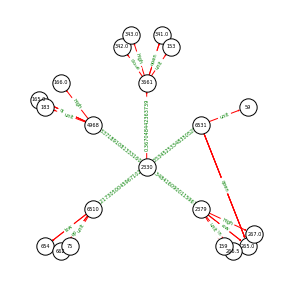

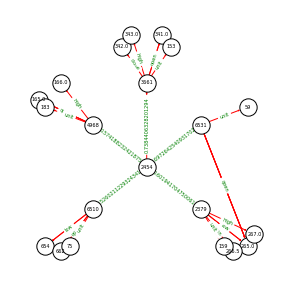

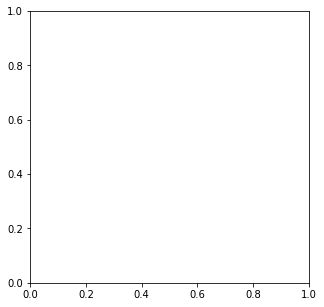

In [67]:
api = '51714d20eae11ba0c9c9647cab45da4b'
for i in stock_num:
    text = i
    stock_sim=pd.read_csv('/Users/Rebeca/Fintech_中信專案/telegram_dome/stock_similarity/'+text+'.csv',index_col=0)
    stock_sim['to'] = df['to'].astype('str')####0614
    dic = {'From':[],'to':[],'relation':[]}

    for n in range(len(stock_sim)):
        dic['From'].append(str(stock_sim['From'][n]))
        dic['to'].append(str(stock_sim['to'][n]))
        dic['relation'].append(stock_sim['relation'][n])

    for i in stock_sim['to']:
        K_data = intraday.chart(apiToken=api,symbolId=i)
        close=K_data.iloc[0]['close']
        high=K_data.iloc[0]['high']
        low=K_data.iloc[0]['low']
        open=K_data.iloc[0]['open']
        unit=K_data.iloc[0]['unit']

        for n in range(5):
            dic['From'].append(i)
        dic['to'].append(str(close))
        dic['to'].append(str(high))
        dic['to'].append(str(low))
        dic['to'].append(str(open))
        dic['to'].append(str(unit))
        dic['relation'].append('close')
        dic['relation'].append('high')
        dic['relation'].append('low')
        dic['relation'].append('open')
        dic['relation'].append('unit')
    
    df = pd.DataFrame(dic)
    #繪圖
    node_dic = {}
    for i in df['From']:
        node_dic[str(i)]=[]
        for j in df[df['From']==i]['to']:
            node_dic[str(i)].append(j)

    layout={}

    #中心連出去
    layout[text]=[0,0]
    layout[node_dic[text][0]]=[0,0.175] #1234
    layout[node_dic[text][1]]=[0.0875,0.0875]
    layout[node_dic[text][2]]=[0.0875,-0.0875]
    layout[node_dic[text][3]]=[-0.0875,0.0875]
    layout[node_dic[text][4]]=[-0.0875,-0.0875]


    #第一支相關聯的股票
    layout[node_dic[node_dic[text][0]][0]]=[-0.04,0.25]
    layout[node_dic[node_dic[text][0]][1]]=[-0.025,0.275]
    layout[node_dic[node_dic[text][0]][2]]=[0,0.29]
    layout[node_dic[node_dic[text][0]][3]]=[0.025,0.275]
    layout[node_dic[node_dic[text][0]][4]]=[0.04,0.25]

    layout[node_dic[node_dic[text][1]][0]]=[0.125,0.165]
    layout[node_dic[node_dic[text][1]][1]]=[0.14,0.175]
    layout[node_dic[node_dic[text][1]][2]]=[0.165,0.165]
    layout[node_dic[node_dic[text][1]][3]]=[0.175,0.14]
    layout[node_dic[node_dic[text][1]][4]]=[0.165,0.125]

    layout[node_dic[node_dic[text][2]][0]]=[0.165,-0.125]
    layout[node_dic[node_dic[text][2]][1]]=[0.175,-0.14]
    layout[node_dic[node_dic[text][2]][2]]=[0.165,-0.165]
    layout[node_dic[node_dic[text][2]][3]]=[0.14,-0.175]
    layout[node_dic[node_dic[text][2]][4]]=[0.125,-0.165]

    layout[node_dic[node_dic[text][3]][0]]=[-0.125,0.165]
    layout[node_dic[node_dic[text][3]][1]]=[-0.14,0.175]
    layout[node_dic[node_dic[text][3]][2]]=[-0.165,0.165]
    layout[node_dic[node_dic[text][3]][3]]=[-0.175,0.14]
    layout[node_dic[node_dic[text][3]][4]]=[-0.165,0.125]


    layout[node_dic[node_dic[text][4]][0]]=[-0.165,-0.125]
    layout[node_dic[node_dic[text][4]][1]]=[-0.175,-0.14]
    layout[node_dic[node_dic[text][4]][1]]=[-0.175,-0.14]
    layout[node_dic[node_dic[text][4]][2]]=[-0.165,-0.165]
    layout[node_dic[node_dic[text][4]][3]]=[-0.14,-0.175]
    layout[node_dic[node_dic[text][4]][4]]=[-0.125,-0.165]

    draw_kg(df,text,layout)


In [62]:
stock_sim=pd.read_csv('/Users/Rebeca/Fintech_中信專案/telegram_dome/stock_similarity/2330.csv',index_col=0)
stock_sim

,From,to,relation
0,2330,2454,0.367048
1,2330,2303,0.353453
2,2330,8086,0.348416
3,2330,3661,0.337189
4,2330,6462,0.217305


In [64]:
type(stock_sim['to'][0])

numpy.int64

In [70]:
text = '2330'
stock_sim=pd.read_csv('/Users/Rebeca/Fintech_中信專案/telegram_dome/stock_similarity/'+text+'.csv',index_col=0)
stock_sim['to'] = df['to'].astype('str')
dic = {'From':[],'to':[],'relation':[]}

for n in range(len(stock_sim)):
    dic['From'].append(str(stock_sim['From'][n]))
    dic['to'].append(str(stock_sim['to'][n]))
    dic['relation'].append(stock_sim['relation'][n])

for i in stock_sim['to']:
    K_data = intraday.chart(apiToken=api,symbolId=i)
    close=K_data.iloc[0]['close']
    high=K_data.iloc[0]['high']
    low=K_data.iloc[0]['low']
    open=K_data.iloc[0]['open']
    unit=K_data.iloc[0]['unit']

    for n in range(5):
        dic['From'].append(i)
    dic['to'].append(str(close))
    dic['to'].append(str(high))
    dic['to'].append(str(low))
    dic['to'].append(str(open))
    dic['to'].append(str(unit))
    dic['relation'].append('close')
    dic['relation'].append('high')
    dic['relation'].append('low')
    dic['relation'].append('open')
    dic['relation'].append('unit')

df = pd.DataFrame(dic)
node_dic = {}
for i in df['From']:
    node_dic[str(i)]=[]
    for j in df[df['From']==i]['to']:
        node_dic[str(i)].append(j)
        
layout={}

#中心連出去
layout[text]=[0,0]
layout[node_dic[text][0]]=[0,0.175] #1234
layout[node_dic[text][1]]=[0.0875,0.0875]
layout[node_dic[text][2]]=[0.0875,-0.0875]
layout[node_dic[text][3]]=[-0.0875,0.0875]
layout[node_dic[text][4]]=[-0.0875,-0.0875]


#第一支相關聯的股票
layout[node_dic[node_dic[text][0]][0]]=[-0.04,0.25]
layout[node_dic[node_dic[text][0]][1]]=[-0.025,0.275]
layout[node_dic[node_dic[text][0]][2]]=[0,0.29]
layout[node_dic[node_dic[text][0]][3]]=[0.025,0.275]
layout[node_dic[node_dic[text][0]][4]]=[0.04,0.25]

layout[node_dic[node_dic[text][1]][0]]=[0.125,0.165]
layout[node_dic[node_dic[text][1]][1]]=[0.14,0.175]
layout[node_dic[node_dic[text][1]][2]]=[0.165,0.165]
layout[node_dic[node_dic[text][1]][3]]=[0.175,0.14]
layout[node_dic[node_dic[text][1]][4]]=[0.165,0.125]

layout[node_dic[node_dic[text][2]][0]]=[0.165,-0.125]
layout[node_dic[node_dic[text][2]][1]]=[0.175,-0.14]
layout[node_dic[node_dic[text][2]][2]]=[0.165,-0.165]
layout[node_dic[node_dic[text][2]][3]]=[0.14,-0.175]
layout[node_dic[node_dic[text][2]][4]]=[0.125,-0.165]

layout[node_dic[node_dic[text][3]][0]]=[-0.125,0.165]
layout[node_dic[node_dic[text][3]][1]]=[-0.14,0.175]
layout[node_dic[node_dic[text][3]][2]]=[-0.165,0.165]
layout[node_dic[node_dic[text][3]][3]]=[-0.175,0.14]
layout[node_dic[node_dic[text][3]][4]]=[-0.165,0.125]


layout[node_dic[node_dic[text][4]][0]]=[-0.165,-0.125]
layout[node_dic[node_dic[text][4]][1]]=[-0.175,-0.14]
layout[node_dic[node_dic[text][4]][1]]=[-0.175,-0.14]
layout[node_dic[node_dic[text][4]][2]]=[-0.165,-0.165]
layout[node_dic[node_dic[text][4]][3]]=[-0.14,-0.175]
layout[node_dic[node_dic[text][4]][4]]=[-0.125,-0.165]

#draw_kg(df,text,layout)


In [72]:
df

,From,to,relation
0,2330,3661,0.367048
1,2330,6531,0.353453
2,2330,2379,0.348416
3,2330,4968,0.337189
4,2330,6510,0.217305
5,3661,342.0,close
6,3661,343.0,high
7,3661,341.0,low
8,3661,341.0,open
9,3661,153,unit


In [73]:
text

'2330'

In [71]:
layout

{'2330': [0, 0],
 '3661': [0, 0.175],
 '6531': [0.0875, 0.0875],
 '2379': [0.0875, -0.0875],
 '4968': [-0.0875, 0.0875],
 '6510': [-0.0875, -0.0875],
 '342.0': [-0.04, 0.25],
 '343.0': [-0.025, 0.275],
 '341.0': [0.025, 0.275],
 '153': [0.04, 0.25],
 '265.0': [0.165, -0.165],
 '59': [0.165, 0.125],
 '267.0': [0.175, -0.14],
 '266.5': [0.14, -0.175],
 '159': [0.125, -0.165],
 '165.0': [-0.175, 0.14],
 '166.0': [-0.14, 0.175],
 '183': [-0.165, 0.125],
 '654': [-0.165, -0.165],
 '662': [-0.14, -0.175],
 '75': [-0.125, -0.165]}

In [76]:
df[df['From']=='2454']#['to']

,From,to,relation


In [30]:
df

,From,to,relation
0,2330,2454,0.367048
1,2330,2303,0.353453
2,2330,8086,0.348416
3,2330,3661,0.337189
4,2330,6462,0.217305
5,2454,477.0,close
6,2454,480.0,high
7,2454,473.0,low
8,2454,473.0,open
9,2454,1814,unit


In [27]:
stock_sim

,From,to,relation
0,2330,2454,0.367048
1,2330,2303,0.353453
2,2330,8086,0.348416
3,2330,3661,0.337189
4,2330,6462,0.217305


In [28]:
df

,From,to,relation
0,2330,2454,0.367048
1,2330,2303,0.353453
2,2330,8086,0.348416
3,2330,3661,0.337189
4,2330,6462,0.217305
5,2454,477.0,close
6,2454,480.0,high
7,2454,473.0,low
8,2454,473.0,open
9,2454,1814,unit
